In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [ ]:
import pandas as pd
df=pd.read_csv("raw_data.csv",encoding='latin-1')
df.head(5)

,Sno,Date,Headline,Covid,Sentiment,Description,Image,Source
0,0,2020-04-29,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Rajasthan on Wednesday reported 74 new coronav...,https://static.inshorts.com/inshorts/images/v1...,http://www.rajswasthya.nic.in/?utm_campaign=fu...
1,1,2020-04-29,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,The total number of coronavirus cases in Delhi...,https://static.inshorts.com/inshorts/images/v1...,https://twitter.com/shemin_joy/status/12555489...
2,2,2020-04-30,"Anguished, I'll always recall our interactions...",0,1,"Condoling the demise of actor Rishi Kapoor, PM...",https://static.inshorts.com/inshorts/images/v1...,https://twitter.com/narendramodi/status/125573...
3,3,2020-04-30,It's a terrible week for Indian cinema: Rahul ...,0,0,Congress leader Rahul Gandhi condoled Rishi Ka...,https://static.inshorts.com/inshorts/images/v1...,https://zeenews.india.com/india/politicians-mo...
4,4,2020-04-30,Delhi Police perform 'parikrama' of AIIMS to t...,1,1,As a sign of respect for healthcare profession...,https://static.inshorts.com/inshorts/images/v1...,https://zeenews.india.com/india/delhi-police-p...


In [ ]:
df=df.sample(frac=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


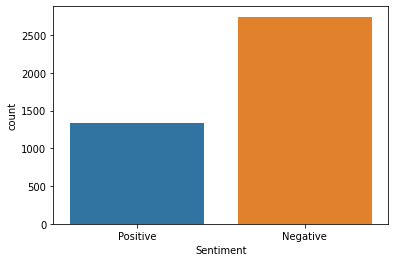

In [ ]:
import seaborn as sns
df_New=df[['Headline','Sentiment']]
df_New['Sentiment']=df_New['Sentiment'].map({0:'Negative',1:'Positive'})
sns.countplot(x='Sentiment', data=df_New)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
from keras.utils import to_categorical
from keras import layers
from tensorflow.keras.layers import SpatialDropout1D
import numpy as np
def predict():
  X = []
  sentences = list(df['Headline'])
  for sen in sentences:
      X.append(preprocess_text(sen))
  y=df['Sentiment']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
  tokenizer = Tokenizer(num_words=5000)
  tokenizer.fit_on_texts(X_train)

  X_train = tokenizer.texts_to_sequences(X_train)
  X_test = tokenizer.texts_to_sequences(X_test)
  vocab_size = len(tokenizer.word_index) + 1

  maxlen = 100

  X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
  X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
  y_train.shape
  print(y_train[:5])
  y_train = to_categorical(y_train, 3)
  y_test = to_categorical(y_test, 3)



  model2 = Sequential()
  model2.add(layers.Embedding(vocab_size, 100, input_length=maxlen))
  model2.add(SpatialDropout1D(0.5))

  model2.add(layers.Bidirectional(layers.LSTM(8,dropout=0.4,recurrent_dropout=0.2,return_sequences=True)))
  model2.add(Dropout(0.5))

  model2.add(layers.Bidirectional(layers.LSTM(8,dropout=0.4,recurrent_dropout=0.2)))
  model2.add(Dropout(0.5))

  #model2.add(layers.Dense(100,activation='relu'))
  model2.add(layers.Dense(3,activation='sigmoid'))
  model2.summary()
  model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
  #checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
  history = model2.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.3)
  score=model2.evaluate(X_test,y_test,verbose=0)
  print('Test loss',score[0])
  print('Test accuracy',score[1])
  print(history.history.keys())
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper left')
  plt.show()
  

4035    0
1765    1
3488    0
949     0
2339    0
Name: Sentiment, dtype: int64
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          540000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 16)           6976      
_________________________________________________________________
dropout (Dropout)            (None, 100, 16)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
__________________________________________

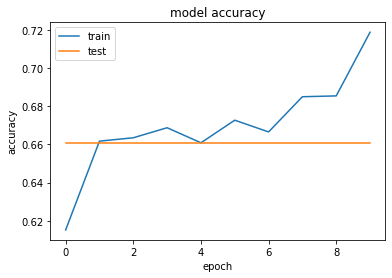

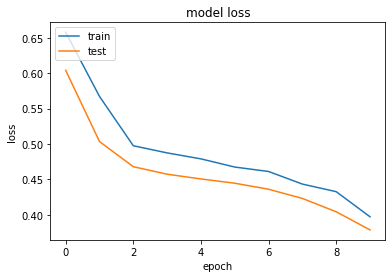

In [ ]:
predict()


